# **HW 1: Exploratory Data Analysis and Dimensionality Reduction in Wine Dataset**
**HW Due date is 02/15/2024, 2:00 pm**

In this assignment, you will analyze the Wine dataset, which contains the results of a chemical analysis of wines grown in a specific region in Italy, derived from three different cultivars (classes). The dataset consists of various chemical properties present in the wines, making it suitable for classification and clustering tasks.

The goals of this assignment are to perform exploratory data analysis (EDA),handle missing data, standardize the data, and apply dimensionality reduction techniques to understand the underlying structure of the dataset.

# The Wine Dataset:`
The dataset consists of the following features:

* Alcohol: The alcohol content of the wine.
* Malic Acid: The malic acid content of the wine.
* Ash: The ash content of the wine.
* Alcalinity of Ash: The amount of ash that results after burning.
* Magnesium: The magnesium content of the wine.
* Total Phenols: The total phenolic content of the wine.
* Flavanoids: The flavonoid content of the wine.
* Nonflavanoid Phenols: The non-flavonoid phenolic content of the wine.
* Proanthocyanins: The proanthocyanin content of the wine.
* Color Intensity: The intensity of color in the wine.
* Hue: The hue of the wine.
* OD280/OD315 of Diluted Wines: The ratio of optical density measurements at 280nm and 315nm of the wine.
* Proline: The proline content of the wine.

Each row in the dataset represents a wine sample, and the target variable is the cultivar (class) of the wine. There are three classes in total, representing three different types of wines.



# Data Loading and Preprocessing:
* Load the Wine dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [132]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd

In [133]:
# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names

**Coding excersice:** Convert the dataset to a DataFrame and display the first few rows of the dataset.

In [134]:
# Convert the dataset to a DataFrame
## Your code starts here
# row= data and colums are the features of wine in the dataFrame
df = pd.DataFrame(data=X, columns=feature_names)
# intiallize target as a feature on y 
df['target'] = y
## Your code ends here

# Display the first few rows of the dataset
## Your code starts here
df.head()
## Your code ends here

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Data Quality Issues:
We artificially impose the following data quality issues to the original dataset. Then use the mean, median and iterative methods to recover the missing values and calculate the mean square error!

**Note:** You need to import IterativeImputer module from fancyimpute library. You might need to run "pip install fancyimpute"

**Note:**
'*SimpleImputer*' is a class provided by scikit-learn for handling missing values in datasets. It provides a simple strategy to impute missing values using the mean, median, most frequent, or constant value of the respective columns.

In [135]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
from fancyimpute import IterativeImputer

# make a copy of the original dataframe
df_original = df.copy()

# Introduce missing values in the dataset for demonstration purposes
# Replace some values with NaN to simulate missing data
df.iloc[10:15, 0] = np.nan
df.iloc[20:25, 1] = np.nan
df.iloc[30:35, 2] = np.nan

# Handling missing values using different methods and calculating RMSE
imputation_methods = ['mean', 'median', 'iterative']
# Write a code to print out the rmse metric for each strategy
## Your code starts here
# intialize variable to store calculated rmse
df_rmse = pd.DataFrame(index=imputation_methods, columns=['RMSE'])
# use a loop to go over imputation_methods
# in each method replace nan values with the calculated value
for method in imputation_methods:
    df_copy=df.copy() 
    if method=='mean' or method=='median':
        imputer=SimpleImputer(strategy=method)
        df_copy.iloc[:,0:3]=imputer.fit_transform(df_copy.iloc[:,0:3]) # nan values will be replaced by the each stratege at the specified location
    elif method=='iterative':
        imputer=IterativeImputer(max_iter=10, random_state=0)
        df_copy.iloc[:,0:3]=imputer.fit_transform(df_copy.iloc[:,0:3])
    # calculate rmse for each strategy in the loop 
    # it helps know the average magnitued between actual and predicted values 
    rmse = sqrt(mean_squared_error(df_original.iloc[:, 0:3].values.flatten(), df_copy.iloc[:, 0:3].values.flatten()))

    
    # Store the RMSE values in the DataFrame
    df_rmse.loc[method, 'RMSE'] = rmse

# Display the DataFrame with RMSE values for each imputation method
print(df_rmse)
## Your code ends here



               RMSE
mean       0.152593
median     0.148694
iterative  0.157906


**Question:** Which method works best? Why do you think is that?

Median works best in this dataset because as we see from above median has the lowest rmse which means the average magnitude of error between predicted value and actual value is lower. So our predict value by median is more close to the actual value
---

# Data Visualization:
**Coding excersice:** Use a box plot to visualize the features of the original data (i.e., dataframe without considering data quality issues)

Text(0.5, 1.0, 'Boxplot for the orginal data')

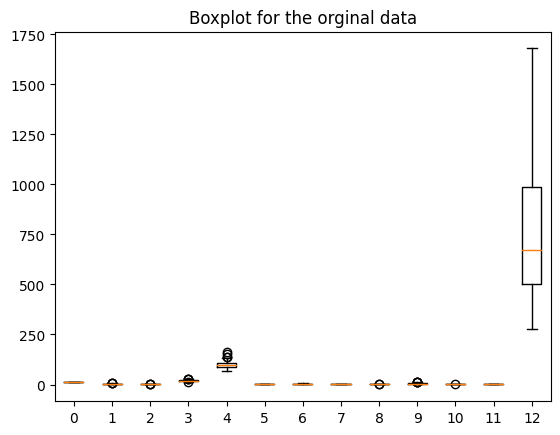

In [136]:
# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
#to make the box more clear I replace the wine features with integer 0-12 which is alcohol=1...target=12
feature_name=[0,1,2,3,4,5,6,7,8,9,10,11,12]
# get the location from orginal data
orginal_data=df_original.iloc[:,feature_name]
#plot the orginal data using boxplot
plt.boxplot(orginal_data.values,labels=feature_name)
plt.title("Boxplot for the orginal data")
## Your code ends here

**Question:** What do you see? What is the problem?
As we see from the graph scale of the orginal data value is ranging from 0 - 1750 but except one, most our features have a value under 250 and our visualiziztion is affacted by it. Therefore the problem is scaling.



# Data Standardization:
**Coding excersice:** Standardize the original data (i.e., dataframe without considering data quality issues) and use the same boxplot to visualize the standardized data!

Text(0.5, 1.0, 'Boxplot for standardized data')

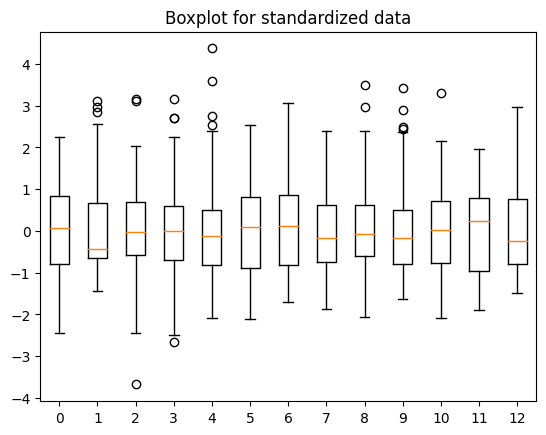

In [137]:
# Standardize the data
## Your code starts here
scaler=StandardScaler()

""" Put the standardized data back into dataframe"""
standardezed_data=pd.DataFrame(scaler.fit_transform(df_original),columns=df_original.columns)
## Your code ends here

# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
""" Use boxplot to show visualize the standardized features """
features=[0,1,2,3,4,5,6,7,8,9,10,11,12]
# plot the standarded data in a boxplot
plt.boxplot(standardezed_data.iloc[:,features].values,labels=feature_name)
plt.title("Boxplot for standardized data")
## Your code ends here

**Question:** Was the problem resolved?
Yes scaling the data value using StandardScaler() solve it.


**Coding excersice:** Calculate correlation matrix and visualize it?

Text(0.5, 1.0, 'visualize correlation matrix')

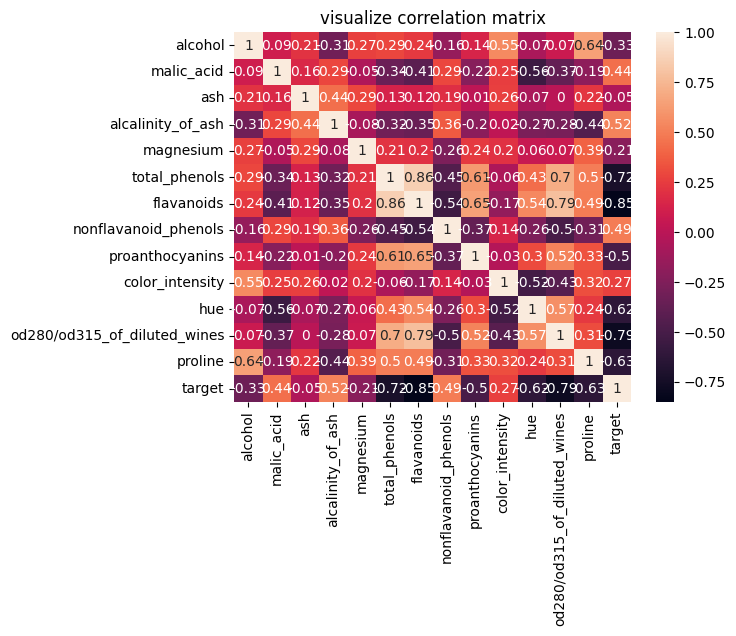

In [138]:
# Calculate correlation matrix
## Your code starts here
# using the orginal data calculate the correlation  matrix
# correlation measure that describes the extent to which two variables change together.
df_original.corr() 

# Visualize correlation matrix
#use heatmap for more vissualization
# the color varations (Darker colors indicate stronger correlations, while lighter colors indicate weaker or no correlations)
sns.heatmap(df_original.corr().round(2), annot=True)
plt.title('visualize correlation matrix')
## Your code ends here

**Question:** What is the intuition behind the correlation matrix?
It is a matrix used to show relationship between two variables in a data set.The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables(x increase , y also increase), 0 a neutral relationship and -1 a not strong relationship. for example the diagonal from left to right have the same color and have a correlation coefficient=1 since they are bassically equal. The colors also tell the relationship between two variables. if two variable have similar colors they have close relationshipe. It helps to understand the structure of the data

# Dimensionality Reduction with PCA
**Coding excersice:** Apply Dimensionality Reduction using PCA. Find the number of principle components to retain using the "explained_variance_ratio". Use the threshold of **0.95** for the cumulative explained variance ratio in order to find the number of principle components.

**Note:** When performing dimensionality reduction using PCA, one of the main considerations is to select the appropriate number of principal components to retain. The explained variance ratio tells us the proportion of variance explained by each principal component. By summing up the explained variance ratios cumulatively, we can see how much of the total variance in the data is explained as we include more principal components.

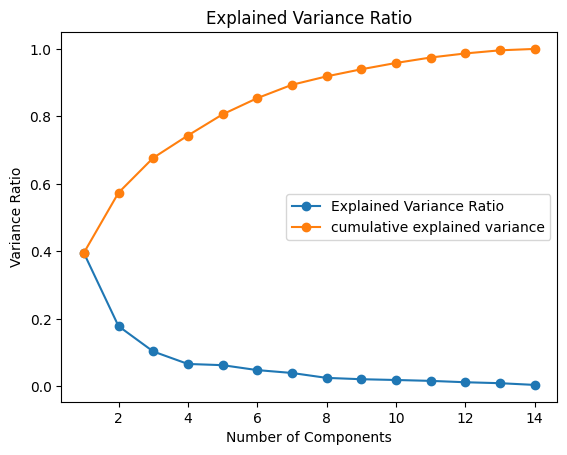

Explained variance ratio of each principal component:
Principal Component 1: 0.395
Principal Component 2: 0.178
Principal Component 3: 0.103
Principal Component 4: 0.066
Principal Component 5: 0.063
Principal Component 6: 0.048
Principal Component 7: 0.040
Principal Component 8: 0.025
Principal Component 9: 0.021
Principal Component 10: 0.019
Principal Component 11: 0.016
Principal Component 12: 0.012
Principal Component 13: 0.009
Principal Component 14: 0.004
Summary:
PCA captures 0.96% of the variance with 10 components.


In [139]:
# Dimensionality Reduction using PCA
# Apply PCA
## Your code starts here
pca= PCA()
data_pca=pca.fit_transform(standardezed_data)

## Your code ends here

# Determine the number of principal components to retain
## Your code starts here
#calculate cumulative explained varince by suming explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# use a threshold to 95% 
threshold = 0.95

# Find the number of components
num_components_retained = np.argmax(cumulative_explained_variance >= threshold) + 1

## Your code ends here

# Plot explained variance ratio
## Your code starts here
#use a line plot to show explained variance ratio, and cumulative_explained_variance
plt.plot(range(1, len(explained_variance_ratio)+1 ), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio)+1 ), cumulative_explained_variance, marker='o', label='cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio')
plt.legend()
plt.show()

## Your code ends here

# Choose the number of components based on the explained variance ratio
## Your code starts here
n_components=num_components_retained
## Your code ends here

# Perform PCA with the chosen number of components
## Your code starts here
# chosen number of component is n_components
pca = PCA(n_components)
data_pca = pca.fit_transform(standardezed_data)
## Your code ends here

# Interpretation and Conclusion
# Interpret principal components
print("Explained variance ratio of each principal component:")
## Your code starts here
# use a loop to show each principale components with decimal place of 3
for i, explained_var in enumerate(explained_variance_ratio, start=1):
   print(f"Principal Component {i}: {explained_var:.3f}")
## Your code ends here

# Summarize key findings
print("Summary:")
""" write your code inside the .format()!"""
print("PCA captures {:.2}% of the variance with {} components.".format(cumulative_explained_variance[num_components_retained - 1], num_components_retained))

**Congratulations!** You completed this assignment.


# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW1.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.

